# Planteamiento del problema

**Escenario:** Uno de nuestros clientes dedicado a embotellar refrescos quiere
 * prevenir la posible falla de sus equipos y 
 * tener una visibilidad del consumo de uno de sus equipos. 

Para esto el equipo de Data Science deberá realizar una propuesta de una propuesta de cómo poder obtener estas predicciones utilizando modelos de Machine Learning o estadístico. El equipo necesita que tú realices:
 * un EDA y 
 * Proponer un modelo para cada caso que permita realizar predicciones a futuro de las variables de la maquinaria del cliente. 
 
Cómo funcionará es, se tienen lecturas de las variables de entrada del modelo, y con estas lecturas poder predecir la variable de salida a futuro. 

Los modelos a desarrollar son el Modelo 1 y el Modelo 8 definidos en el excel 
adjunto.

#Modelo 1 AIR CONTRONIC - Linea 2

 Seleccionamos las variables del modelo 1

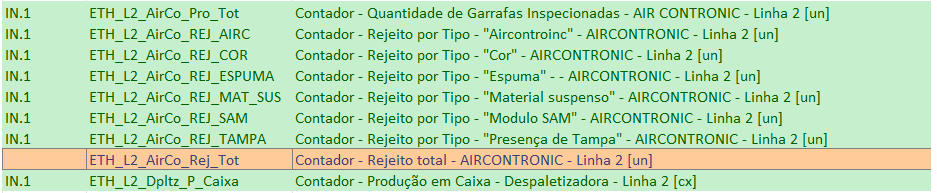

## descripcion de variables

La informacion que tenemos pertenece al equipo AIR CONTRONIC de la linea 2.b. Estas variables son de tipo Contador (Variable Acumuladora – en general, puede llegar a cero cuando cambia de orden de producción);


* Pro_Tot:	Número de botellas inspeccionadas  [un]
* REJ_AIRC:	Rechazo por Tipo - "Aircontronic"  [un]
* REJ_COR:	Rechazo por Tipo - "Color"
* REJ_ESPUMA:	Rechazo por Tipo - "Espuma"  [un]
* REJ_MAT_SUS:	Rechazo por Tipo - "Material suspendido"
* REJ_SAM:	Rechazo por Tipo  - "Modulo SAM" [un]
* REJ_TAMPA:	Rechazo por Tipo -"Presencia de la tapa" [un]
* Dpltz_P_Caixa	Producción de cajas - Despaletizador [caja]
* **Rej_Tot:	Rechazo total - AIRCONTRONIC - Linha 2 [un]**

La variable sobre la que queremos hacer predicciones es `Rej_Tot`

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [100]:
#cargar datos

mod1_df = pd.read_pickle("/content/mod1_subset.pkl")
mod1_df


,equipo,time,smt,num
0,ETH_L2_AirCo_Pro_Tot,2022-12-31 04:09:13.000,0,0
1,ETH_L2_AirCo_Pro_Tot,2023-01-02 17:35:08.000,0,1
2,ETH_L2_AirCo_Pro_Tot,2023-01-02 17:35:09.000,0,3
3,ETH_L2_AirCo_Pro_Tot,2023-01-02 17:35:10.000,0,5
4,ETH_L2_AirCo_Pro_Tot,2023-01-02 17:35:18.000,0,6
...,...,...,...,...
4840316,ETH_L2_AirCo_REJ_TAMPA,2023-01-19 23:41:01.000,0,264
4840317,ETH_L2_AirCo_REJ_TAMPA,2023-01-19 23:43:32.000,0,265
4840318,ETH_L2_AirCo_REJ_TAMPA,2023-01-19 23:45:58.000,0,266
4840319,ETH_L2_AirCo_REJ_TAMPA,2023-01-19 23:48:23.000,0,267


In [101]:
mod1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667564 entries, 0 to 4840320
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   equipo  667564 non-null  object
 1   time    667564 non-null  object
 2   smt     667564 non-null  int64 
 3   num     667564 non-null  object
dtypes: int64(1), object(3)
memory usage: 25.5+ MB


In [102]:
mod1_df['equipo'].value_counts()

ETH_L2_AirCo_Pro_Tot        515090
ETH_L2_AirCo_Rej_Tot         67180
ETH_L2_AirCo_REJ_AIRC        35755
ETH_L2_Dpltz_P_Caixa         27877
ETH_L2_AirCo_REJ_ESPUMA      14513
ETH_L2_AirCo_REJ_TAMPA        3761
ETH_L2_AirCo_REJ_MAT_SUS      3169
ETH_L2_AirCo_REJ_SAM           214
ETH_L2_AirCo_REJ_COR             5
Name: equipo, dtype: int64

## limpieza de datos

Convertir la columna `num` a tipo entero

In [103]:
mod1_df.num= mod1_df.num.astype(int)

In [104]:
mod1_df['num'].duplicated().sum()

416323

In [105]:
mod1_df['num'].describe()

count    6.675640e+05
mean     1.025327e+05
std      2.493229e+05
min      0.000000e+00
25%      1.086000e+04
50%      8.377350e+04
75%      1.771820e+05
max      1.342302e+08
Name: num, dtype: float64

convertir la columna 'time' a un objeto de fecha y hora de pandas.

In [106]:
# Convertir la columna de fecha al formato de fecha y hora
mod1_df['datetime'] = pd.to_datetime(mod1_df['time'], format='%Y-%m-%d %H:%M')

## extraer datos de fecha y hora
mod1_df['date'] = mod1_df['datetime'].dt.date
mod1_df['time'] = mod1_df['datetime'].dt.time

mod1_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 667564 entries, 0 to 4840320
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   equipo    667564 non-null  object        
 1   time      667564 non-null  object        
 2   smt       667564 non-null  int64         
 3   num       667564 non-null  int64         
 4   datetime  667564 non-null  datetime64[ns]
 5   date      667564 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 35.7+ MB


ordenamos por 'datetime'

In [107]:
mod1_df= mod1_df.sort_values(by='datetime')
mod1_df.head()

,equipo,time,smt,num,datetime,date
4818659,ETH_L2_AirCo_REJ_COR,05:38:07,0,0,2022-12-24 05:38:07,2022-12-24
0,ETH_L2_AirCo_Pro_Tot,04:09:13,0,0,2022-12-31 04:09:13,2022-12-31
4782904,ETH_L2_AirCo_REJ_AIRC,04:09:15,0,0,2022-12-31 04:09:15,2022-12-31
4818664,ETH_L2_AirCo_REJ_ESPUMA,04:09:15,0,0,2022-12-31 04:09:15,2022-12-31
4833177,ETH_L2_AirCo_REJ_MAT_SUS,04:09:15,0,0,2022-12-31 04:09:15,2022-12-31


Observar la columna `'smt'`

In [108]:
mod1_df['smt'].value_counts()

 0             667546
-2147483648        18
Name: smt, dtype: int64

In [109]:
mod1_df[mod1_df['smt']==-2147483648 ].sort_values(by=['datetime'])

,equipo,time,smt,num,datetime,date
582283,ETH_L2_Dpltz_P_Caixa,20:02:38.353000,-2147483648,120,2023-01-02 20:02:38.353,2023-01-02
594916,ETH_L2_Dpltz_P_Caixa,01:47:58.133000,-2147483648,23740,2023-01-11 01:47:58.133,2023-01-11
4835175,ETH_L2_AirCo_REJ_MAT_SUS,09:51:07,-2147483648,0,2023-01-13 09:51:07.000,2023-01-13
4827668,ETH_L2_AirCo_REJ_ESPUMA,09:51:07,-2147483648,5,2023-01-13 09:51:07.000,2023-01-13
4818660,ETH_L2_AirCo_REJ_COR,09:51:07,-2147483648,0,2023-01-13 09:51:07.000,2023-01-13
4839131,ETH_L2_AirCo_REJ_TAMPA,09:51:07,-2147483648,1,2023-01-13 09:51:07.000,2023-01-13
4808082,ETH_L2_AirCo_REJ_AIRC,09:51:07,-2147483648,110,2023-01-13 09:51:07.000,2023-01-13
4836477,ETH_L2_AirCo_REJ_SAM,09:51:07,-2147483648,2,2023-01-13 09:51:07.000,2023-01-13
561781,ETH_L2_AirCo_Rej_Tot,09:51:46,-2147483648,127,2023-01-13 09:51:46.000,2023-01-13
343678,ETH_L2_AirCo_Pro_Tot,09:51:46,-2147483648,821,2023-01-13 09:51:46.000,2023-01-13


Suposición: podemos eliminar  los renglones donde `mod1_df['smt']==-2147483648`, ya que representan una fracción del orden de `10^(-5)` de los datos, además de me no hay información sobre la interpretación que se podría dar.

Además, vamos a eliminar la columna 'smt' ya que al parecer no arroja información relevante

In [110]:
#eliminamos renglones
mod1_df=mod1_df[mod1_df['smt']!=-2147483648]

#eliminamos columna 'smt'
mod1_df.drop('smt', axis= "columns", inplace=True)


<ipython-input-110-2e443b8c64e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod1_df.drop('smt', axis= "columns", inplace=True)


### Buscar datos faltantes

In [111]:
mod1_df.isna().sum() #no hay

equipo      0
time        0
num         0
datetime    0
date        0
dtype: int64

# EDA Visualizar los datos

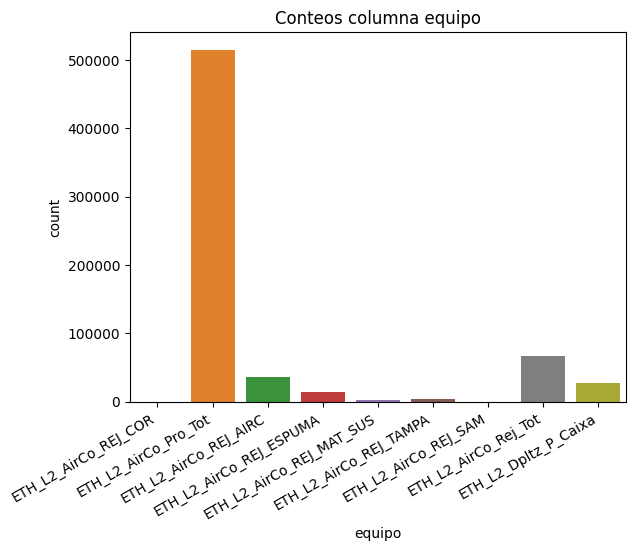

In [112]:
sns.countplot(x=mod1_df.loc[:,'equipo'])
plt.xticks(rotation= 30, ha="right")
plt.title('Conteos columna equipo')
plt.show()

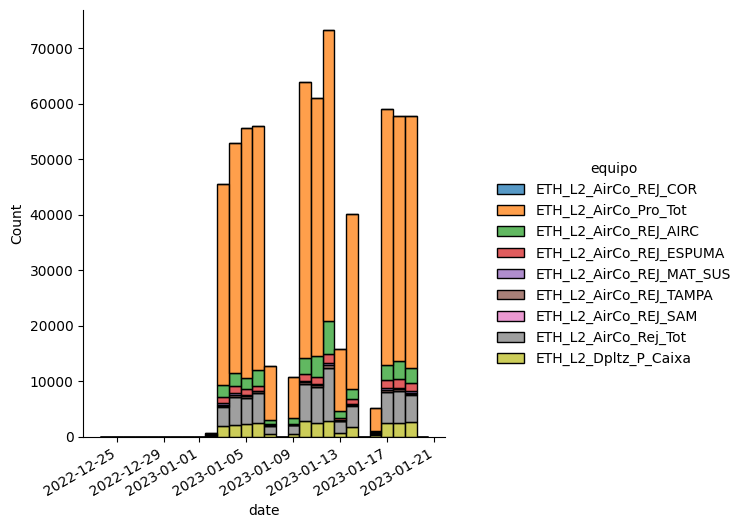

In [113]:
# cantidad de datos por día
sns.displot(data=mod1_df, x="date", hue='equipo', multiple="stack")
plt.xticks(rotation= 30, ha="right")
plt.show()

In [114]:
mod1_df.groupby('date')["equipo"].nunique()

date
2022-12-24    1
2022-12-31    8
2023-01-02    8
2023-01-03    8
2023-01-04    8
2023-01-05    8
2023-01-06    8
2023-01-07    8
2023-01-08    2
2023-01-09    8
2023-01-10    8
2023-01-11    8
2023-01-12    8
2023-01-13    9
2023-01-14    8
2023-01-16    8
2023-01-17    9
2023-01-18    8
2023-01-19    8
2023-01-20    8
Name: equipo, dtype: int64

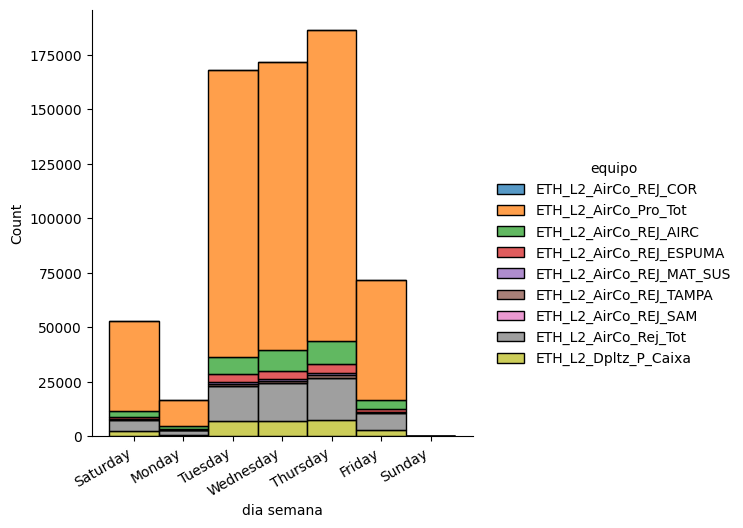

In [115]:
mod1_df['dia semana']= mod1_df['datetime'].dt.day_name()
sns.displot(data=mod1_df, x="dia semana", hue='equipo', multiple="stack")
plt.xticks(rotation= 30, ha="right")
plt.show()

Observar datos de columna num

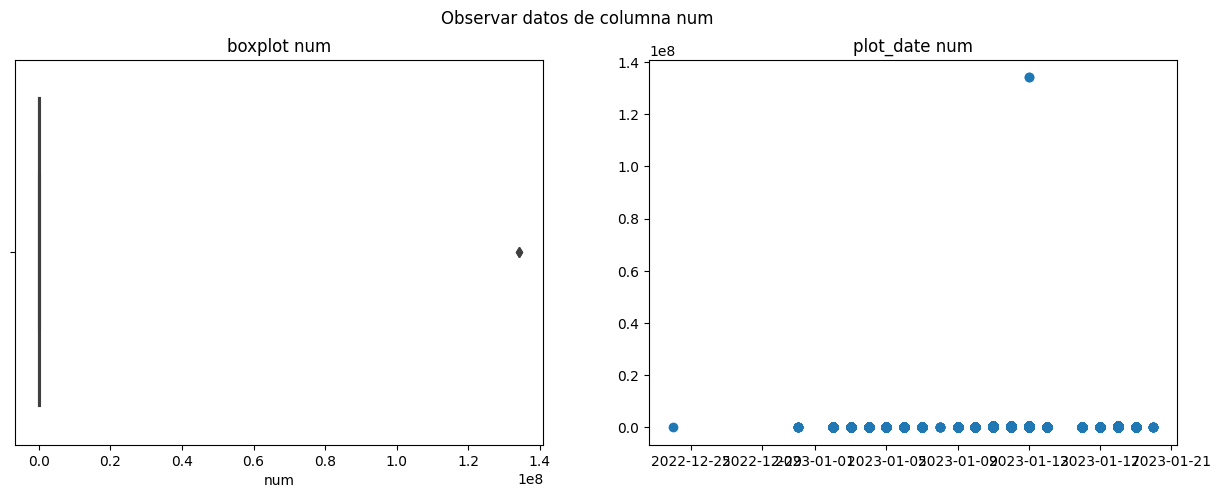

In [116]:
fig, axes = plt.subplots(1,2, figsize=(15, 5)) #
fig.suptitle('Observar datos de columna num')

plt.subplot(1,2,1)
sns.boxplot(x=mod1_df['num'])

plt.subplot(1,2,2)
plt.plot_date( mod1_df['datetime'].dt.date, mod1_df['num'])
axes[0].set_title('boxplot num')
axes[1].set_title('plot_date num')
plt.show()

encontramos datos anomalos

In [117]:
mod1_df['num'].describe()

count    6.675460e+05
mean     1.025354e+05
std      2.493257e+05
min      0.000000e+00
25%      1.086225e+04
50%      8.377750e+04
75%      1.771838e+05
max      1.342302e+08
Name: num, dtype: float64

In [118]:
mod1_df[mod1_df['num']>0.5e+08]

,equipo,time,num,datetime,date,dia semana
560459,ETH_L2_AirCo_Rej_Tot,01:30:19,134230163,2023-01-13 01:30:19,2023-01-13,Friday
4836466,ETH_L2_AirCo_REJ_SAM,01:30:19,134217728,2023-01-13 01:30:19,2023-01-13,Friday


In [119]:
#Quitamos esos valores anómalos
mod1_df=mod1_df[mod1_df['num']<0.5e+08]

## Pivotear la tabla para que el equipo quede como columnas

In [135]:
pivotmod1= mod1_df.pivot_table(index=mod1_df.index,
                    columns='equipo', 
                    values='num',
                    aggfunc='mean') 

pivotmod1.fillna(0, inplace=True)
pivotmod1

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_COR,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_AirCo_Rej_Tot,ETH_L2_Dpltz_P_Caixa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4840316,0.0,0.0,0.0,0.0,0.0,0.0,264.0,0.0,0.0
4840317,0.0,0.0,0.0,0.0,0.0,0.0,265.0,0.0,0.0
4840318,0.0,0.0,0.0,0.0,0.0,0.0,266.0,0.0,0.0
4840319,0.0,0.0,0.0,0.0,0.0,0.0,267.0,0.0,0.0


In [133]:
pivotmod1.describe()

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_COR,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_AirCo_Rej_Tot,ETH_L2_Dpltz_P_Caixa
count,667544.000000,667544.000000,667544.0,667544.00000,667544.000000,667544.000000,667544.000000,667544.000000,667544.000000
mean,101077.982767,150.516740,0.0,19.24155,1.380426,0.595806,0.943839,427.553015,455.304549
std,92045.296576,801.809166,0.0,158.50492,25.177490,253.689380,15.401892,1612.343153,2630.009839
min,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4832.750000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,83776.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,177182.250000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,326625.000000,9760.000000,0.0,2738.00000,877.000000,131107.000000,552.000000,67383.000000,27730.000000


In [122]:
#quitamos ETH_L2_AirCo_REJ_COR
pivotmod1.drop('ETH_L2_AirCo_REJ_COR', axis=1, inplace=True)

## Pivotear tabla usando el promedio por día de num cómo value
para poder hacer pairplots

In [123]:
pivotmeans= mod1_df.pivot_table(index='date',
                    columns='equipo', 
                    values='num',
                    aggfunc='mean').fillna(0)
pivotmeans.drop('ETH_L2_AirCo_REJ_COR', axis=1, inplace=True)
pivotmeans.head()

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_AirCo_Rej_Tot,ETH_L2_Dpltz_P_Caixa
date,,,,,,,,
2022-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-02,151.916667,117.463087,18.100000,10.100000,3.000000,30.241379,152.940860,168.529412
2023-01-03,95761.400773,1514.937837,740.083854,290.198718,8571.826087,130.162500,2252.245690,8308.783644
2023-01-04,129693.403067,2174.868455,997.362745,413.305949,23.272727,183.486880,3514.865296,10748.505155


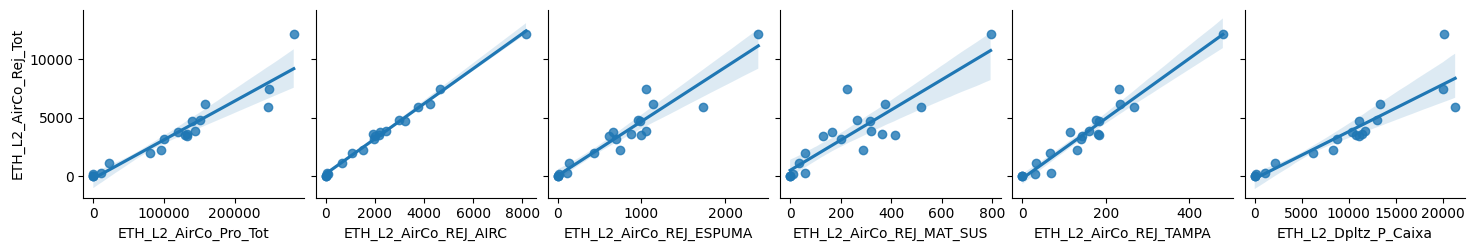

In [124]:
sns.pairplot(pivotmeans, x_vars=['ETH_L2_AirCo_Pro_Tot', 'ETH_L2_AirCo_REJ_AIRC', 'ETH_L2_AirCo_REJ_ESPUMA', 
                                'ETH_L2_AirCo_REJ_MAT_SUS', 'ETH_L2_AirCo_REJ_TAMPA',  'ETH_L2_Dpltz_P_Caixa'], 
                                  y_vars='ETH_L2_AirCo_Rej_Tot',  kind='reg')
plt.show()

In [125]:
columns=pivotmeans.columns.to_list()

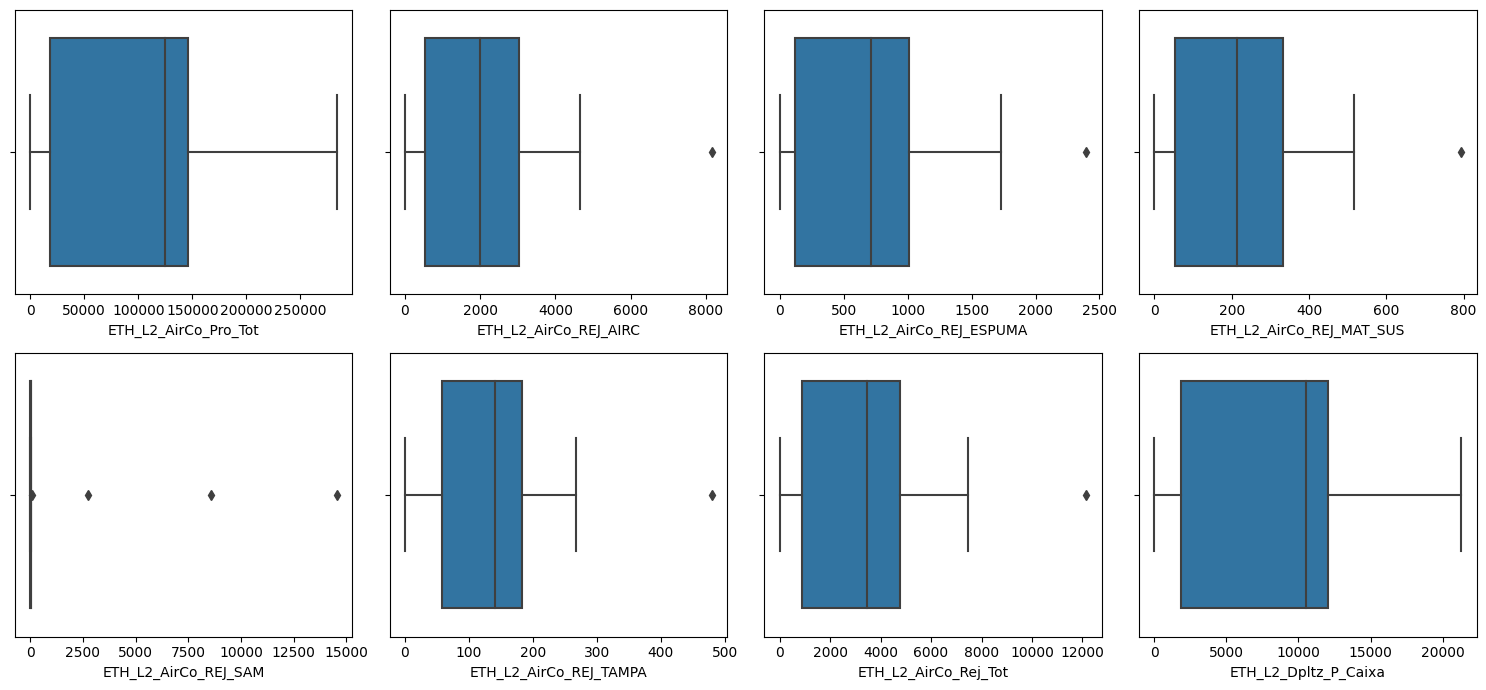

In [127]:
fig = plt.figure(figsize=(15,7))
for idx,col_name in enumerate(columns):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=pivotmeans.loc[:,col_name])
plt.tight_layout()
plt.show()

In [128]:
# ¿cuales son los datos anomalos?
# Calcular el primer y tercer cuartil para cada columna y rango intercuartílico
q1 = pivotmeans.quantile(0.25)
q3 = pivotmeans.quantile(0.75)
iqr = q3 - q1

outliers = (pivotmeans > (q3 + 1.5*iqr))
pivotmeans[~outliers]

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_AirCo_Rej_Tot,ETH_L2_Dpltz_P_Caixa
date,,,,,,,,
2022-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-02,151.916667,117.463087,18.100000,10.100000,3.000000,30.241379,152.940860,168.529412
2023-01-03,95761.400773,1514.937837,740.083854,290.198718,NaN,130.162500,2252.245690,8308.783644
2023-01-04,129693.403067,2174.868455,997.362745,413.305949,23.272727,183.486880,3514.865296,10748.505155
2023-01-05,132058.346234,1938.866435,879.979249,365.641711,22.473684,181.909677,3576.062298,11444.486626
2023-01-06,133073.544740,2028.976283,610.442029,128.340741,15.842105,142.203571,3410.562339,11027.702929
2023-01-07,249165.958350,4661.276650,1055.657609,223.309091,25.666667,232.189189,7450.228253,20051.373737
2023-01-08,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000


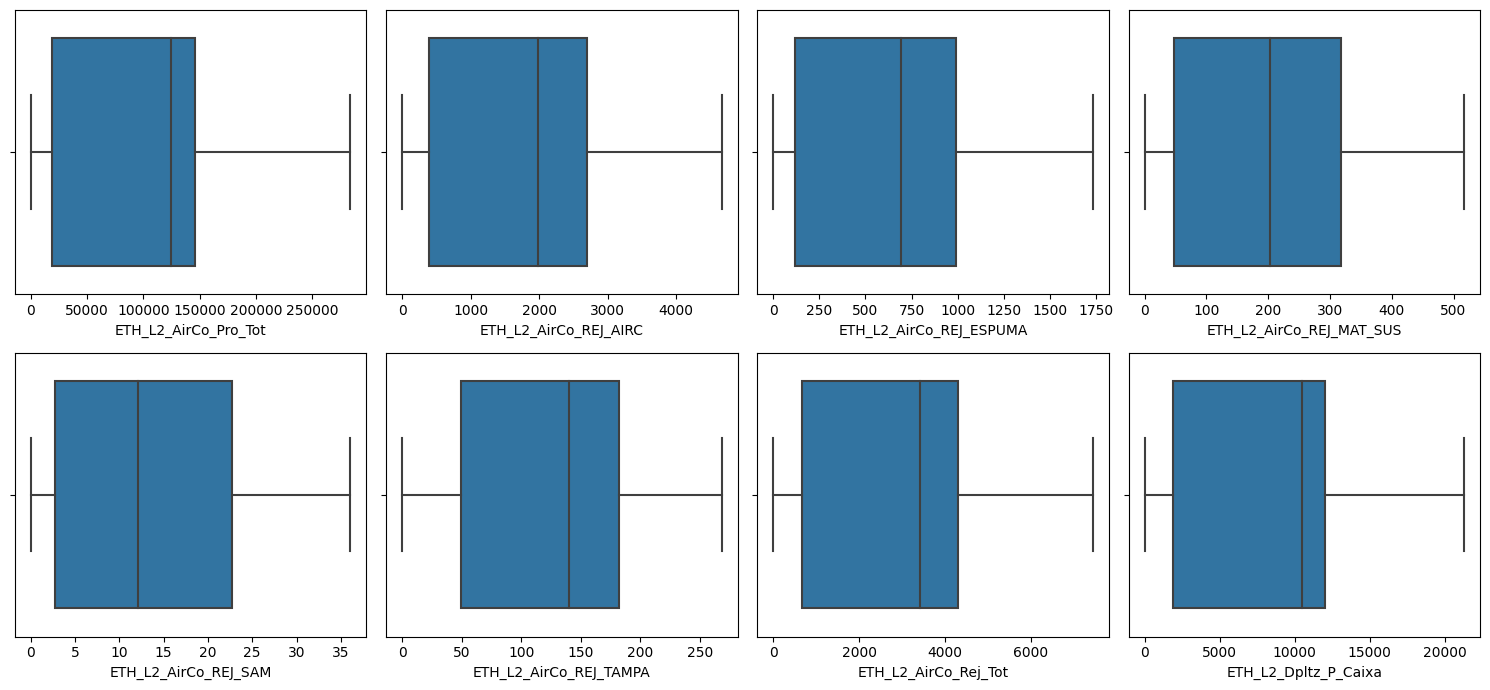

In [129]:
fig = plt.figure(figsize=(15,7))
for idx,col_name in enumerate(columns):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=pivotmeans[~outliers].loc[:,col_name])
plt.tight_layout()
plt.show()

# regresion lineal

### separamos la variable a predecir

In [138]:
#separamos la variable a predecir
y = pivotmeans['ETH_L2_AirCo_Rej_Tot'].values
print(y.shape)
#df.drop(columns='Sales',inplace=True)

(20,)


### variables de entrada

In [140]:


X_df=pivotmeans.copy()
X_df.drop(columns='ETH_L2_AirCo_Rej_Tot',inplace=True)

pd.DataFrame(X_df,columns=X_df.columns)  # Sólo para visualizar los datos

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_Dpltz_P_Caixa
date,,,,,,,
2022-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-02,151.916667,117.463087,18.100000,10.100000,3.000000,30.241379,168.529412
2023-01-03,95761.400773,1514.937837,740.083854,290.198718,8571.826087,130.162500,8308.783644
2023-01-04,129693.403067,2174.868455,997.362745,413.305949,23.272727,183.486880,10748.505155
2023-01-05,132058.346234,1938.866435,879.979249,365.641711,22.473684,181.909677,11444.486626
2023-01-06,133073.544740,2028.976283,610.442029,128.340741,15.842105,142.203571,11027.702929
2023-01-07,249165.958350,4661.276650,1055.657609,223.309091,25.666667,232.189189,20051.373737
2023-01-08,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000


In [141]:
X_df.describe()

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_Dpltz_P_Caixa
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,109759.940142,2159.244239,729.162700,226.948179,1309.070234,141.080406,9035.076456
std,86850.374586,2016.898594,621.544505,206.710954,3692.103367,114.710791,6868.331465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18754.460589,538.628835,123.771060,53.548780,3.750000,57.692108,1865.000000
50%,124504.986203,2008.076272,717.295337,213.236564,17.671053,141.327042,10522.017496
75%,145544.478316,3028.232716,1011.070484,332.177201,28.986607,182.882029,12053.632397
max,283900.781565,8153.665663,2398.246575,793.886076,14565.888889,479.918182,21290.000000


### entrenamiento
split

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,y, train_size=0.75, random_state=123) 

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((15, 7), (15,))
Prueba: ((5, 7), (5,))


modelo regresion lineal

In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [147]:
lr.score(X_train,y_train)

0.9992691639654352

Podemos acceder a los coeficientes de la regresión. Vemos que hay un coeficiente por cada feature. 

In [159]:
lr.coef_

array([ 1.48710881e-03,  1.35501566e+00,  2.19940812e+00, -5.88028444e+00,
        1.45043745e-02,  1.09721153e+00, -2.64939741e-02])

In [160]:
pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.columns)

equipo,ETH_L2_AirCo_Pro_Tot,ETH_L2_AirCo_REJ_AIRC,ETH_L2_AirCo_REJ_ESPUMA,ETH_L2_AirCo_REJ_MAT_SUS,ETH_L2_AirCo_REJ_SAM,ETH_L2_AirCo_REJ_TAMPA,ETH_L2_Dpltz_P_Caixa
0,0.001487,1.355016,2.199408,-5.880284,0.014504,1.097212,-0.026494


### prediccion

In [150]:
y_pred_test = lr.predict(X_test)

Representemos gráficamente esta comparación

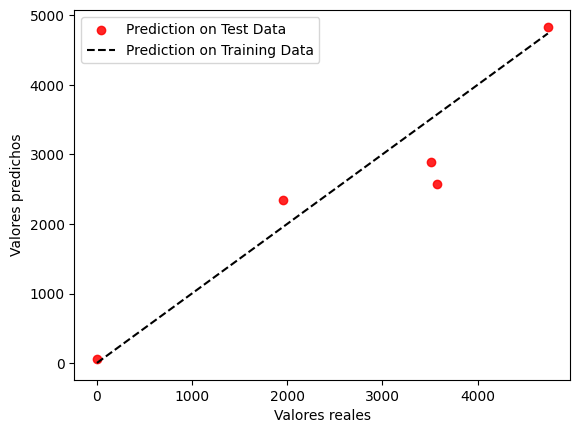

In [157]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
# plt.plot(y_tr, y_predict_train_lr, 'bx')
plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

# Observaciones:

* Los días que cuentan con los registros mas completos son los días hábiles.
* De acuerdo a los pairplots se puede concluir que hacer modelo de regresion lineal para predecir la variable de saluiuda es lo mas factible
* se propone hacer un análisis de regresión lineal con los datos pivoteados como columnas usando como indice una agrupación por hora para hacer predicciones sobre la variable de salida y analizar los coeficientes correspondientes a cada feature de la regresion lineal para prevenir posibles falla de sus equipos.
